<a href="https://colab.research.google.com/github/soumiyak/21ADR049/blob/main/Cervical_cancer_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly
import plotly.express as px

In [ ]:
cancer_df=pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")

In [ ]:
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
cancer_df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

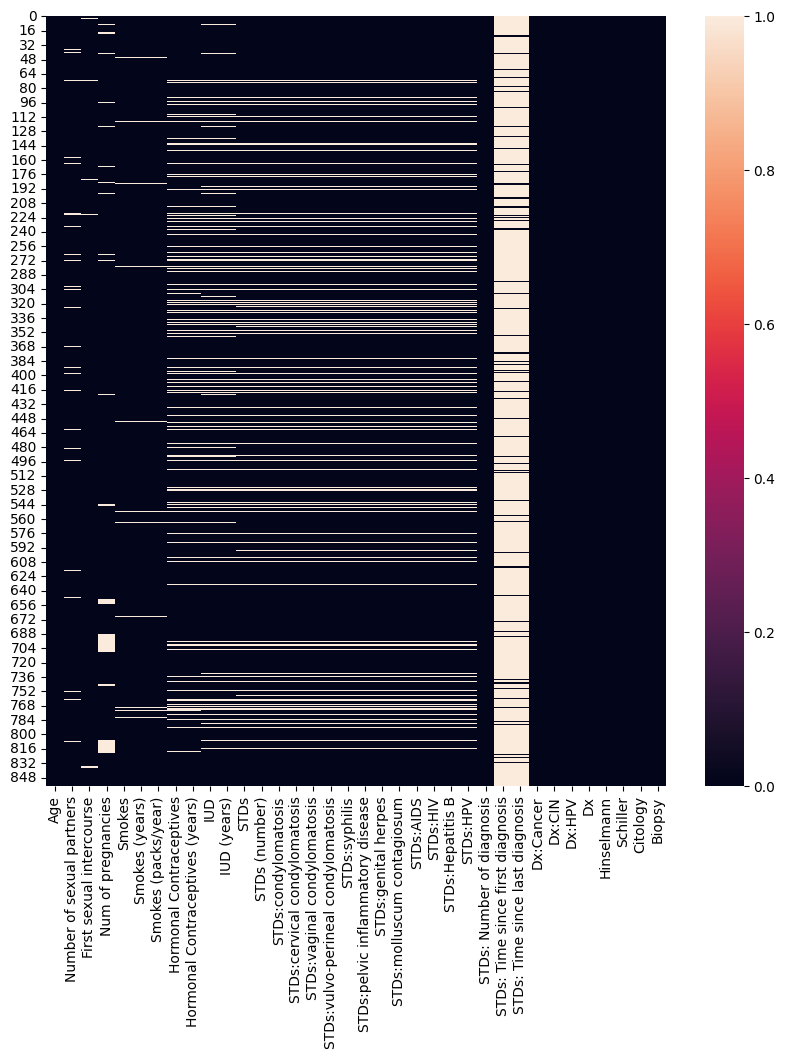

In [ ]:
#exploring the data
cancer_df

#replacing missing values with null
cancer_df = cancer_df.replace('?',np.nan)

#plot heatmap of missing values
cancer_df.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(cancer_df.isnull())

#handling data types
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

In [ ]:
#dropping unnecessary columns
cancer_df = cancer_df.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

#replacing null values
cancer_df = cancer_df.fillna(cancer_df.mean())
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


DATA VISUALIZATION

<Axes: >

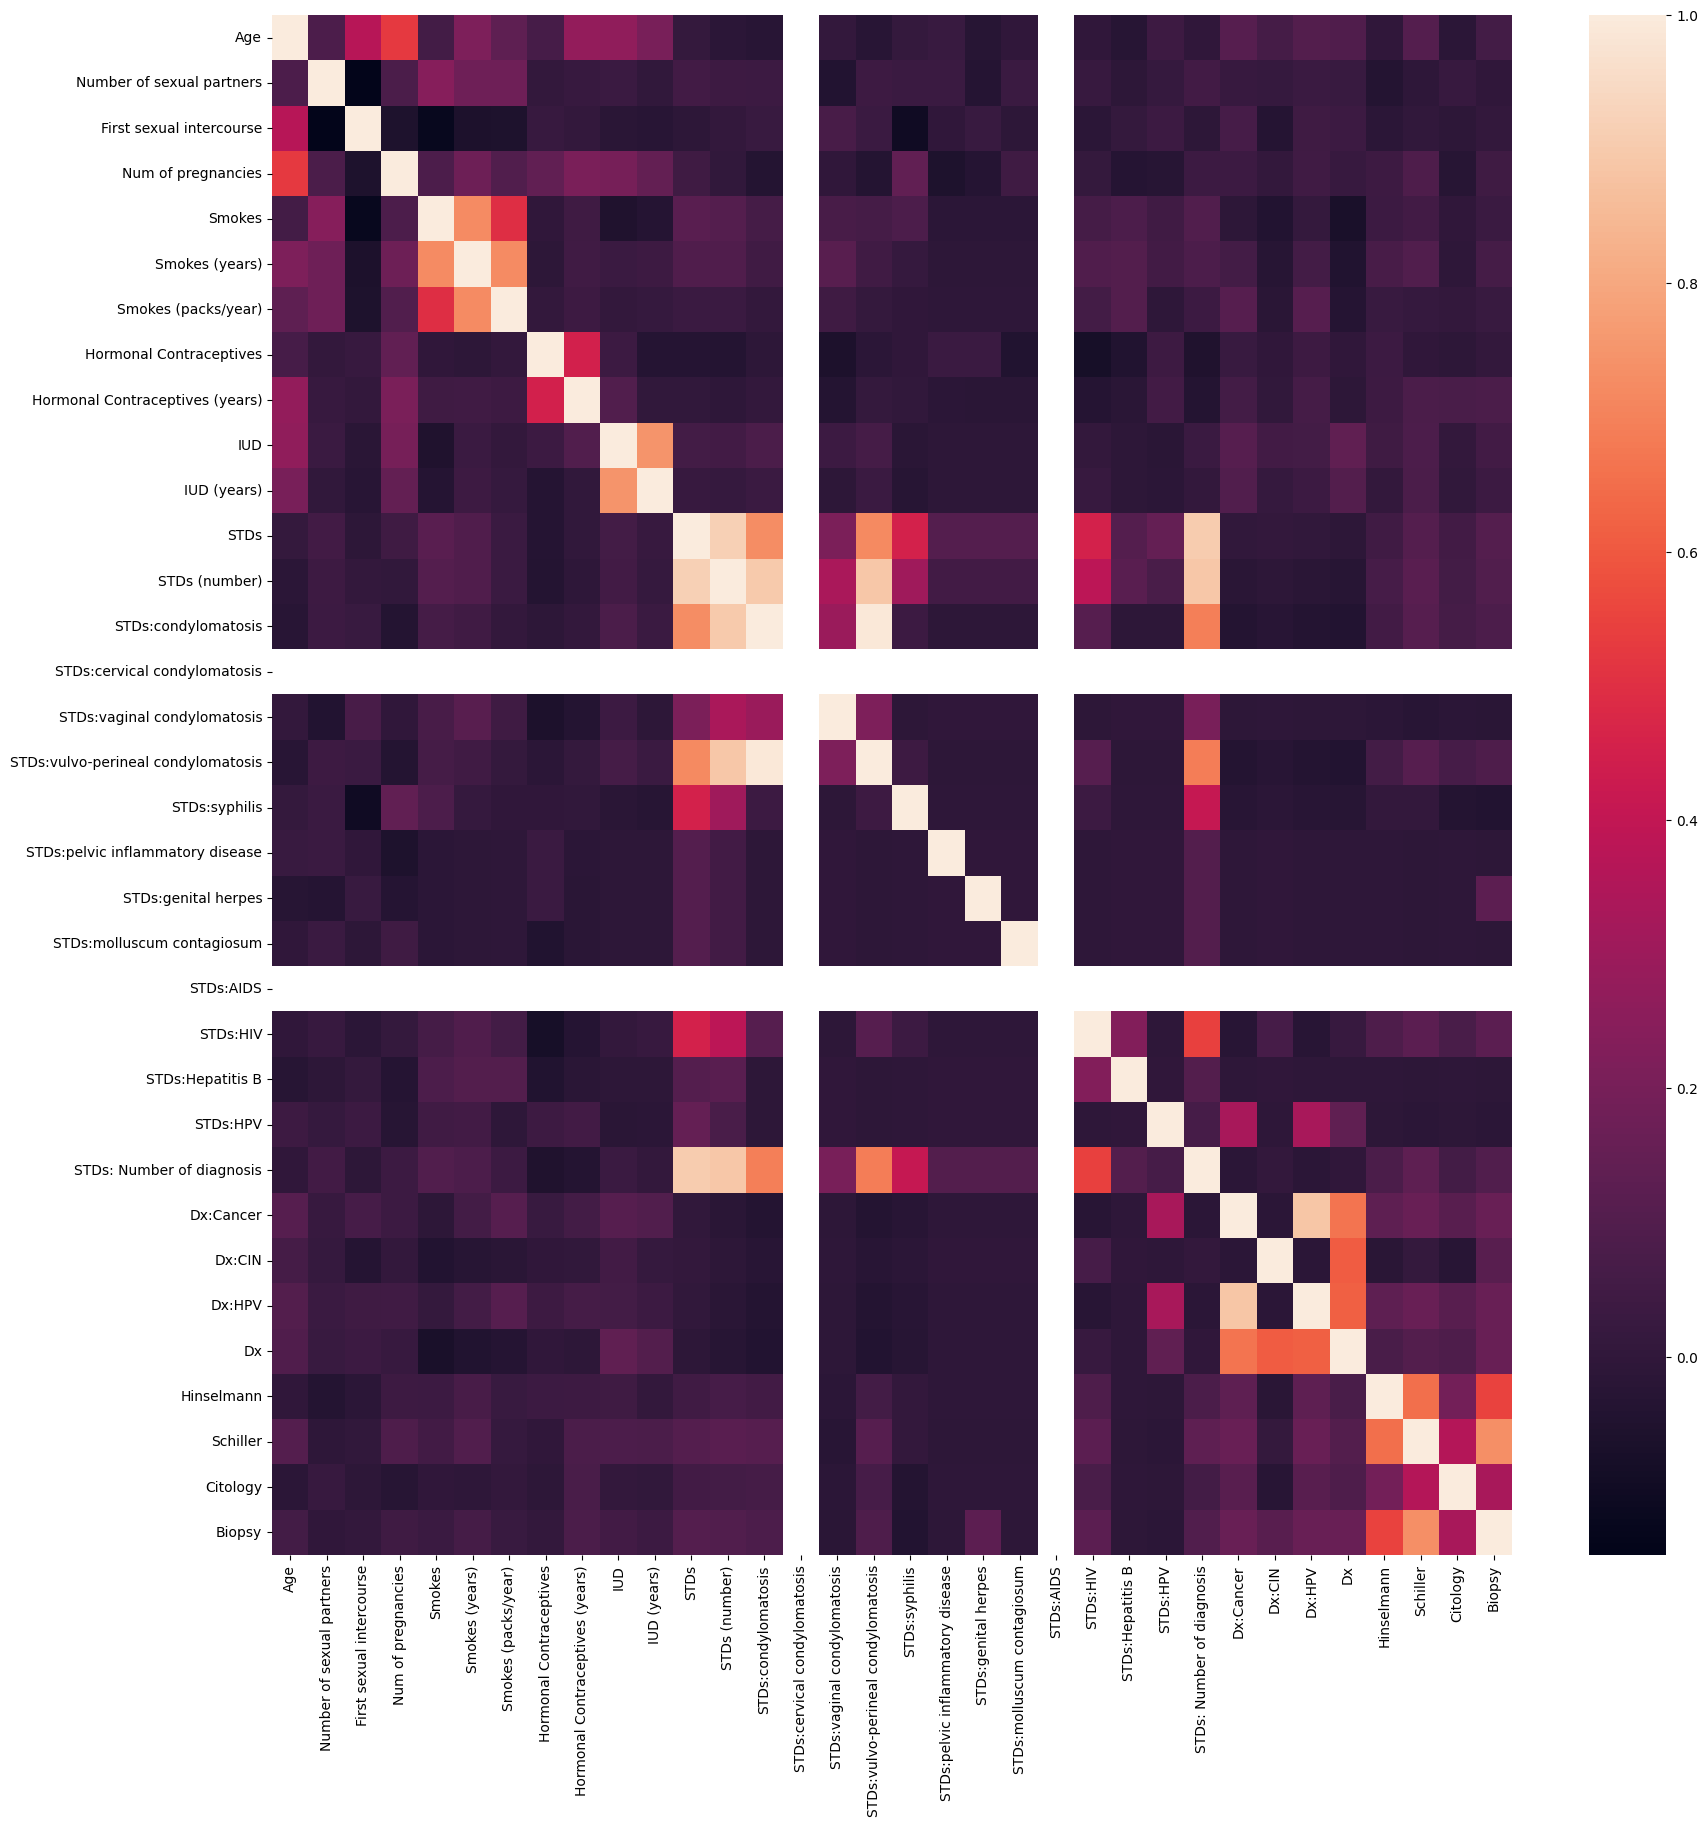

In [ ]:
#Getting the correlation matrix
corr_matrix = cancer_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix)

DATA PREPARATION

In [ ]:
#Preparing the data for traning
targetdf = cancer_df['Biopsy']
inputdf = cancer_df.drop(columns = ['Biopsy'])

#convert the input and target datatype
x = np.array(inputdf).astype('float32')
y = np.array(targetdf).astype('float32')

#Scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

#splitting the data
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)
xTest, xVal, yTest, yVal = train_test_split(xTest, yTest, test_size=0.5)

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
model = xgboost.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=10)
model.fit(xTrain,yTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#making predictions on testing data
yPredict = model.predict(xTest)

#making classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(yTest,yPredict))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        77
         1.0       0.75      0.33      0.46         9

    accuracy                           0.92        86
   macro avg       0.84      0.66      0.71        86
weighted avg       0.91      0.92      0.90        86



# **Interpretation of the Classification Report**

For class 0:
Out of the women that the model predicted would get cancer, 94% did.
Out of all women who got cancer, the model predicted this outcome correctly for 99% of them.
The F1 score is = 0.96
Since the F1 score is close to 1, the model does a good job in predicting whether the women get cancer for class 0.

For class 1:
The precision and recall are at a low of 67% and 29% respectively. These scores can be improved drastically.

<Axes: >

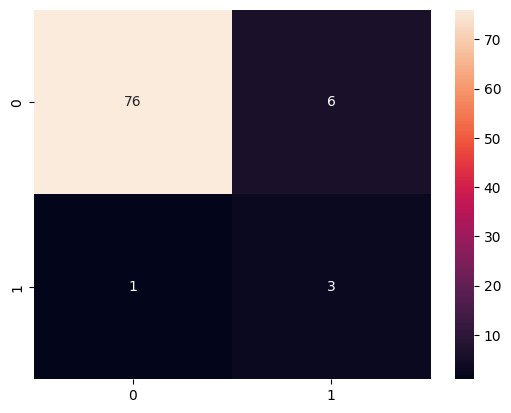

In [ ]:
#making confusion matrix
confusionmatrix = confusion_matrix(yPredict, yTest)
sns.heatmap(confusionmatrix, annot = True)

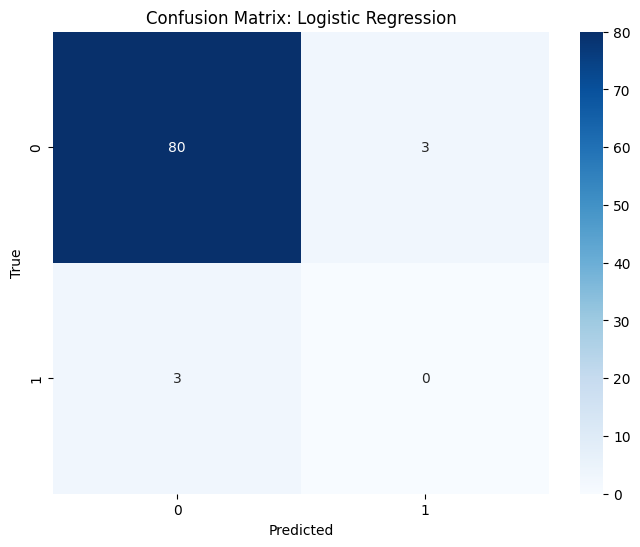

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train the classifier
log_reg = LogisticRegression()
log_reg.fit(xTrain, yTrain)
yPred = log_reg.predict(xVal)

# Confusion Matrix
cm = confusion_matrix(yVal, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




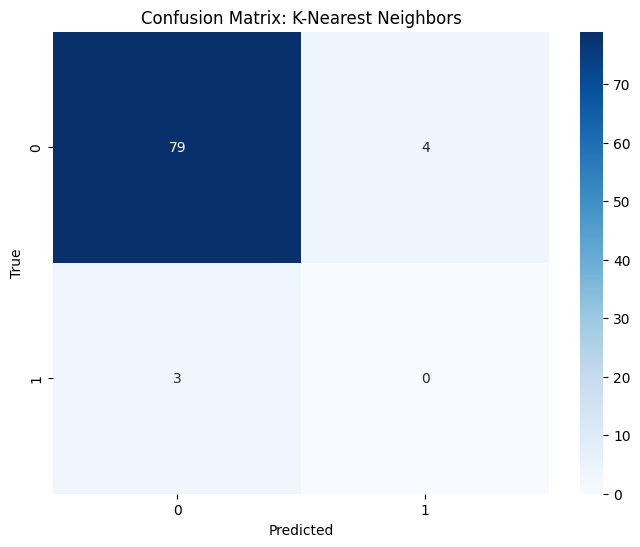

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the classifier
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)
yPred = knn.predict(xVal)

# Confusion Matrix
cm = confusion_matrix(yVal, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




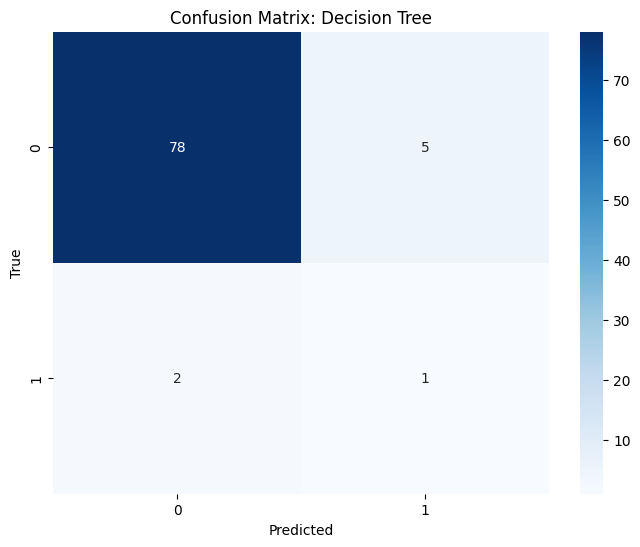

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the classifier
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)
yPred = dt.predict(xVal)

# Confusion Matrix
cm = confusion_matrix(yVal, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




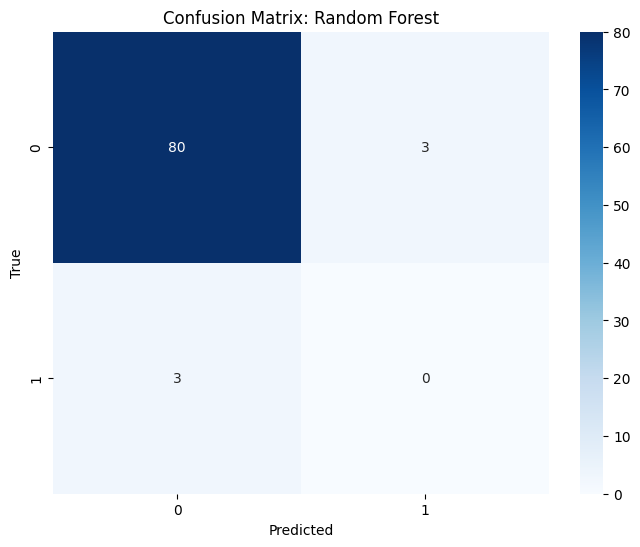

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the classifier
rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)
yPred = rf.predict(xVal)

# Confusion Matrix
cm = confusion_matrix(yVal, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




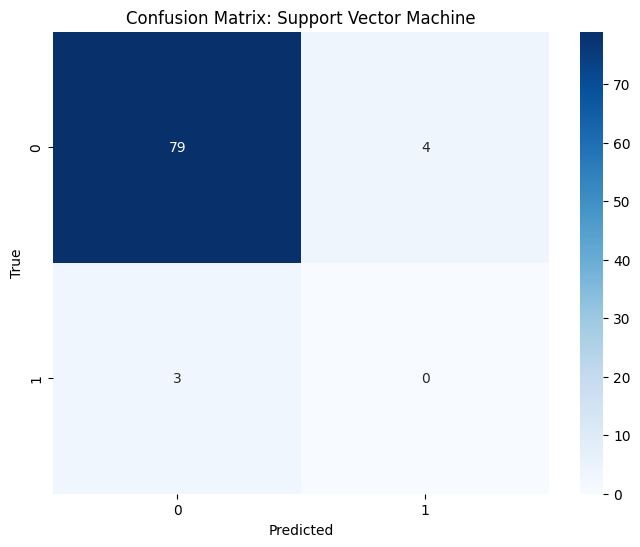

In [ ]:
from sklearn.svm import SVC

# Train the classifier
svc = SVC(probability=True)
svc.fit(xTrain, yTrain)
yPred = svc.predict(xVal)

# Confusion Matrix
cm = confusion_matrix(yVal, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve



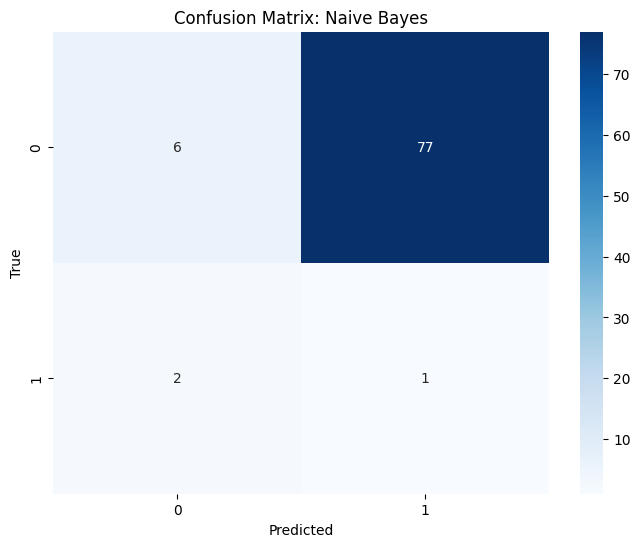

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the classifier
nb = GaussianNB()
nb.fit(xTrain, yTrain)
yPred = nb.predict(xVal)

# Confusion Matrix
cm = confusion_matrix(yVal, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




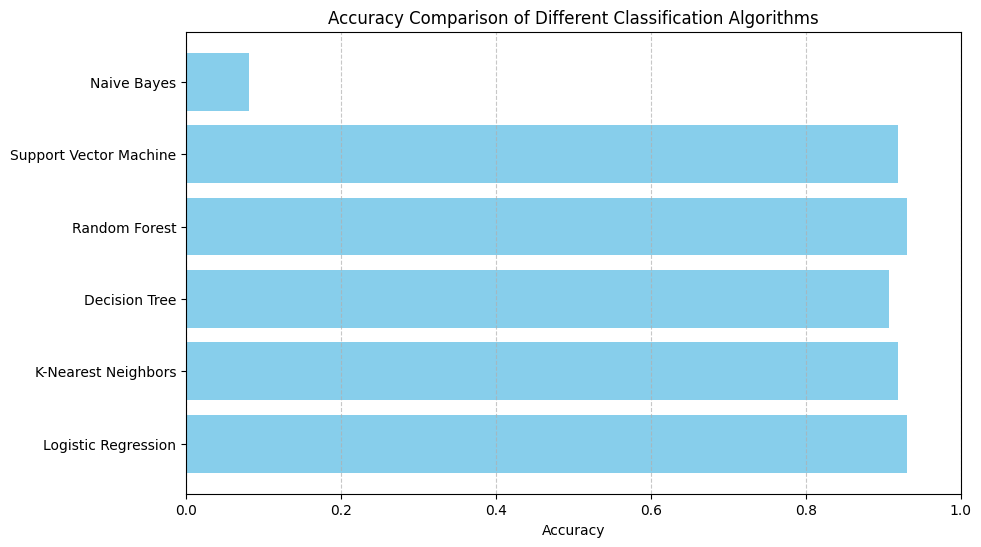

In [ ]:
# Train and evaluate each classifier
accuracy_scores = {}
for clf_name, clf in classifiers.items():
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xVal)
    accuracy = accuracy_score(yVal, yPred)
    accuracy_scores[clf_name] = accuracy

fig, ax = plt.subplots(figsize=(10, 6))
algorithms = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

ax.barh(algorithms, accuracy_values, color='skyblue')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy Comparison of Different Classification Algorithms')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()